## Parsing A thaliana GO_terms

First, a meta-data base on sample information is build.

Second, a meta-data base on gene information retrieved from bulk GO annotations from TAIR are build.

### FIRST: meta-data base of sample information is build. 

In [3]:
import os 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

try:
    # Change the current working Directory    
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/meta-data/")
    #print("Current Directory:", os.getcwd())
except OSError:
    print("Can't change the Current Working Directory")    

In [39]:
## Parameters:
## GOFILTER 
# GO_cat = 'func'
GO_cat = 'comp'
# GO_cat = 'proc'

## FILE TO ANALYZE
sfile = 'matrix_E_infected.csv'

## TITLE TO BE USED IN PLOTS
title_plot = 'molecular component'


### Functions

In [5]:
def make_pie_donut_chart(q, lbs, title):
    fig1, ax1 = plt.subplots(figsize=(15,10))
    # Labels with percentual and float values
    ax1.pie(q, labels=lbs,autopct=make_autopct2(q), 
             textprops={'fontsize': 14}, startangle=90)              
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.text(0, -.1, title, ha='center', fontsize=24)

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()
    return

In [6]:
def make_autopct2(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct

### SECOND: meta-data base on gene information retrieved from bulk GO annotations from TAIR are build.

This meta-data file is for attaching to a Plot Dendogram in wgcna.
<br>
Meta data were retrieved from TAIR DB based from the bulk data retrieval tools. Gene Ontology annotations filtered  by "Functional Categorization" were consulted and here results are treated to use it as meta-data in our analysis. 

In [7]:
# This is the file get from TAIR (https://www.arabidopsis.org/tools/bulk/go/index.jsp)
df = pd.read_csv("athal_GO_terms.txt",  sep='\t', usecols=[0,3,4,5,6,7]) 

In [8]:
df.columns
df.head(3)

,Locus,GO term,GO ID,TAIR internal GO id,category,GO Slim(s)
0,AT1G01010,nucleus,GO:0005634,537.0,comp,nucleus
1,AT1G01010,"regulation of transcription, DNA-templated",GO:0006355,7461.0,proc,other cellular processes | nucleobase-containi...
2,AT1G01010,DNA-binding transcription factor activity,GO:0003700,4449.0,func,DNA-binding transcription factor activity


In [9]:
# Select the fields of interest and rename columns for a fashion use 
df.columns = ['locus','GO_term','GO_id','TAIR_id','category','GO_slim']
print(df.shape)
df.columns

(201479, 6)


Index(['locus', 'GO_term', 'GO_id', 'TAIR_id', 'category', 'GO_slim'], dtype='object')

In [10]:
df

,locus,GO_term,GO_id,TAIR_id,category,GO_slim
0,AT1G01010,nucleus,GO:0005634,537.0,comp,nucleus
1,AT1G01010,"regulation of transcription, DNA-templated",GO:0006355,7461.0,proc,other cellular processes | nucleobase-containi...
2,AT1G01010,DNA-binding transcription factor activity,GO:0003700,4449.0,func,DNA-binding transcription factor activity
3,AT1G01010,"regulation of transcription, DNA-templated",GO:0006355,7461.0,proc,other cellular processes | other metabolic pro...
4,AT1G01020,mitochondrion,GO:0005739,486.0,comp,mitochondrion
...,...,...,...,...,...,...
201474,ATMG01400,mitochondrion,GO:0005739,486.0,comp,mitochondrion
201475,ATMG01400,biological_process_unknown,GO:0008150,5239.0,proc,unknown biological processes
201476,ATMG01410,molecular_function_unknown,GO:0003674,3226.0,func,unknown molecular functions
201477,ATMG01410,biological_process_unknown,GO:0008150,5239.0,proc,unknown biological processes


In [11]:
# chek uniques by category
df.category.unique()

array(['comp', 'proc', 'func', nan], dtype=object)

In [12]:
## Filter df by GO category (proceses and component are removed, just keep funciton category)
is_gene_func = (df['category']== GO_cat)     
df_meta = df[is_gene_func]

In [13]:
# chk size and see for duplicated functions 
df_meta.shape

(88793, 6)

In [14]:
df_meta.head(3)

,locus,GO_term,GO_id,TAIR_id,category,GO_slim
0,AT1G01010,nucleus,GO:0005634,537.0,comp,nucleus
4,AT1G01020,mitochondrion,GO:0005739,486.0,comp,mitochondrion
8,AT1G01020,chloroplast,GO:0009507,175.0,comp,chloroplast


In [15]:
# exploring possible filters 
print(len(df_meta.GO_term.unique()))
df_meta.GO_term.unique()

840


array(['nucleus', 'mitochondrion', 'chloroplast', 'Golgi apparatus',
       'endoplasmic reticulum', 'cortical endoplasmic reticulum',
       'nuclear dicing body', 'cytoplasm', 'cytosol', 'nucleoplasm',
       'plasma membrane', 'chloroplast stroma', 'plastid',
       'chloroplast thylakoid membrane', 'chloroplast envelope',
       'cytosolic large ribosomal subunit', 'cytosolic ribosome',
       'membrane', 'extracellular region', 'cellular_component_unknown',
       'cell plate', 'endosome', 'RNA polymerase III complex',
       'SPOTS complex', 'plant-type cell wall', 'extracellular space',
       'U2-type spliceosomal complex', 'peroxisome',
       'chromosome, centromeric region', 'chromatin',
       'cytoplasmic stress granule', 'trans-Golgi network', 'vacuole',
       'plasmodesma', 'Golgi-associated vesicle membrane',
       'lysosomal membrane',
       'integral component of lumenal side of endoplasmic reticulum membrane',
       'integral component of cytoplasmic side of endo

In [16]:
# exploring possible filters 
print(len(df_meta.GO_id.unique()))
df_meta.GO_term.unique()

840


array(['nucleus', 'mitochondrion', 'chloroplast', 'Golgi apparatus',
       'endoplasmic reticulum', 'cortical endoplasmic reticulum',
       'nuclear dicing body', 'cytoplasm', 'cytosol', 'nucleoplasm',
       'plasma membrane', 'chloroplast stroma', 'plastid',
       'chloroplast thylakoid membrane', 'chloroplast envelope',
       'cytosolic large ribosomal subunit', 'cytosolic ribosome',
       'membrane', 'extracellular region', 'cellular_component_unknown',
       'cell plate', 'endosome', 'RNA polymerase III complex',
       'SPOTS complex', 'plant-type cell wall', 'extracellular space',
       'U2-type spliceosomal complex', 'peroxisome',
       'chromosome, centromeric region', 'chromatin',
       'cytoplasmic stress granule', 'trans-Golgi network', 'vacuole',
       'plasmodesma', 'Golgi-associated vesicle membrane',
       'lysosomal membrane',
       'integral component of lumenal side of endoplasmic reticulum membrane',
       'integral component of cytoplasmic side of endo

In [17]:
# exploring possible filters 
print(len(df_meta.GO_term.unique()))
df_meta.GO_id.unique()

840


array(['GO:0005634', 'GO:0005739', 'GO:0009507', 'GO:0005794',
       'GO:0005783', 'GO:0032541', 'GO:0010445', 'GO:0005737',
       'GO:0005829', 'GO:0005654', 'GO:0005886', 'GO:0009570',
       'GO:0009536', 'GO:0009535', 'GO:0009941', 'GO:0022625',
       'GO:0022626', 'GO:0016020', 'GO:0005576', 'GO:0005575',
       'GO:0009504', 'GO:0005768', 'GO:0005666', 'GO:0035339',
       'GO:0009505', 'GO:0005615', 'GO:0005684', 'GO:0005777',
       'GO:0000775', 'GO:0000785', 'GO:0010494', 'GO:0005802',
       'GO:0005773', 'GO:0009506', 'GO:0030660', 'GO:0005765',
       'GO:0071556', 'GO:0071458', 'GO:0015629', 'GO:0005730',
       'GO:0031969', 'GO:0005778', 'GO:0005779', 'GO:0005618',
       'GO:0048046', 'GO:0031012', 'GO:0043529', 'GO:0036266',
       'GO:0005874', 'GO:0005871', 'GO:0032588', 'GO:0030141',
       'GO:0042025', 'GO:0030015', 'GO:0000932', 'GO:0008180',
       'GO:0000139', 'GO:0035145', 'GO:0016607', 'GO:0005789',
       'GO:0005788', 'GO:0016021', 'GO:0009707', 'GO:00

In [18]:
# chk how many locus extists in the df
print(len(df_meta.locus.unique()))
df_meta.locus.unique()

26061


array(['AT1G01010', 'AT1G01020', 'AT1G01030', ..., 'ATMG01370',
       'ATMG01400', 'ATMG01410'], dtype=object)

In [19]:
# arbitrary remove duplicates and just keep the first locus ocurrence to have a reduced df to attach to the wgcna dendogram
df_unique = df_meta.drop_duplicates(subset = ["locus"])
# gene variants may be lost, need to find a better way to filter  ....

In [20]:
print(len(df_unique))
#df_unique.rename(columns={'locus': 'Genes'}, inplace=True)
df_gene_func = df_unique.rename({'locus':'Genes'}, axis='columns')

26061


In [23]:
GO_cat
%pwd

'/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/meta-data'

In [24]:
# df_gene_func.to_csv('../results-data/genes_arranged_byGO_'+ GO_cat +'.csv', header=True, sep='\t', index=False)

### Load expression matrix to merge the gene functions asociated
### Arabidopsis INFECTED dataset

In [27]:
df_infected_MatE = pd.read_csv("../results-data/matrices_de_expresion/" + sfile, sep='\t') 

In [28]:
print(df_gene_func.shape)
print(df_infected_MatE.shape)

(26061, 6)
(20274, 15)


In [29]:
df_infected_MatE_GOFunc = df_infected_MatE.merge(df_gene_func,on=['Genes'],how='left')
df_infected_MatE_GOFunc.shape

(20274, 20)

### Plot categorical gene function in the raw matrix (infected)

In [30]:
#df_infected_MatE_GOFunc
#df_plt_GOSlim = df_infected_MatE_GOFunc[['Genes','GO_slim']]   # es muy larga la cadena de descripción -- complica la graficación
df_plt_GOSlim = df_infected_MatE_GOFunc[['Genes','GO_id']]
df_plt_GOSlim

,Genes,GO_id
0,AT1G01020,GO:0005739
1,AT1G01030,GO:0005634
2,AT1G01040,GO:0005634
3,AT1G01050,GO:0005634
4,AT1G01060,GO:0005634
...,...,...
20269,ATMG01350,GO:0005739
20270,ATMG01360,GO:0005751
20271,ATMG01370,GO:0005739
20272,ATMG01400,GO:0005739


In [31]:
# count genes by category
df_tmp = df_plt_GOSlim.groupby(['GO_id']).count()
print(len(df_tmp))
df_tmp.tail(8)

486


,Genes
GO_id,
GO:1990072,1
GO:1990124,1
GO:1990246,2
GO:1990316,1
GO:1990726,2
GO:1990745,1
GO:1990879,1
GO:1990904,8


### reset idx, sort values, get desdcribe() and filter range to visualize

In [32]:
df_tmp.reset_index(level='GO_id', col_level=1, inplace=True)
df_tmp

,GO_id,Genes
0,GO:0000110,1
1,GO:0000118,4
2,GO:0000124,2
3,GO:0000127,3
4,GO:0000137,10
...,...,...
481,GO:1990316,1
482,GO:1990726,2
483,GO:1990745,1
484,GO:1990879,1


In [33]:
#df_tmp.hist()

In [34]:
df_tmp.describe()

,Genes
count,486.000000
mean,39.703704
std,306.159878
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5520.000000


In [36]:
#df_tmp.sort_values(['Genes'])
## Filter df by GO category. Ejm: function (proceses and component are removed, just keep funciton category)
is_gene_grater1 = df_tmp['Genes']>=2    
df_tmp_infected = df_tmp[is_gene_grater1]
df_tmp_infected.head(5)

,GO_id,Genes
1,GO:0000118,4
2,GO:0000124,2
3,GO:0000127,3
4,GO:0000137,10
5,GO:0000138,15


In [37]:
#goslim = df_tmp_infected['GO_slim'].tolist() -----this field is to large to plot
data = df_tmp_infected['Genes'].to_list()
goslim = df_tmp_infected['GO_id'].tolist()

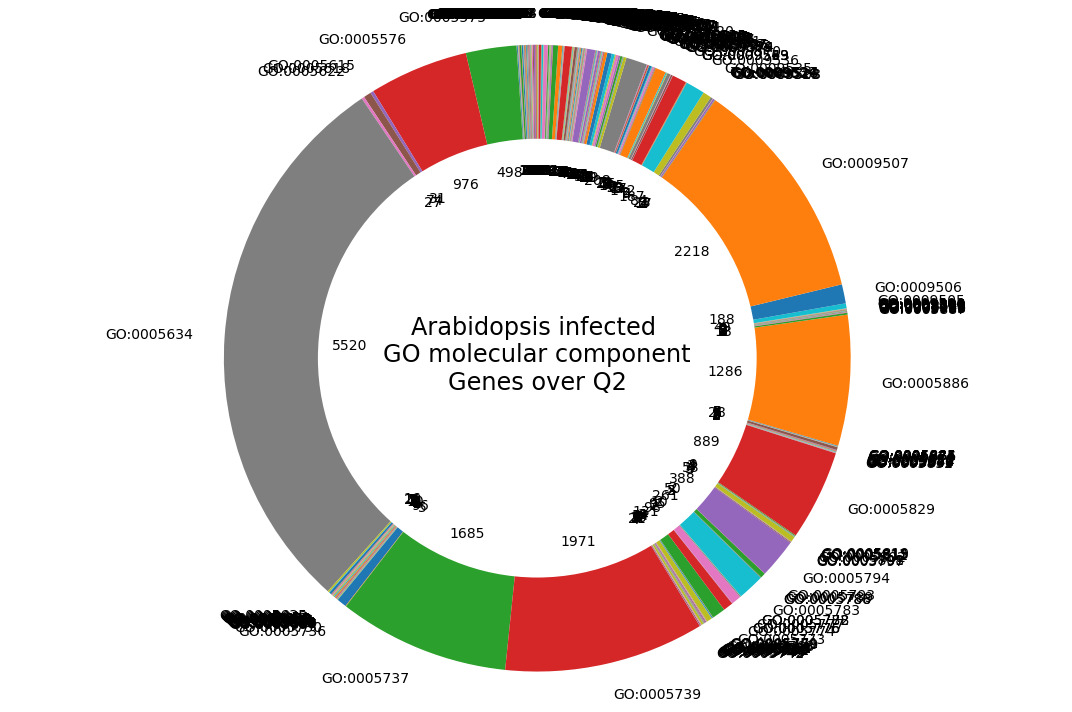

In [40]:
# plot a pie chart by GO Category
make_pie_donut_chart(data, goslim, 'Arabidopsis infected \nGO '+ title_plot +'\nGenes over Q2')

In [43]:
# sort by gene count in ascending way
df_TopGO_terms =  df_tmp_infected.sort_values(['Genes'], ascending=False).head(10)
print(title_plot)
print(sfile)
df_TopGO_terms
#lst_GO_terms_selected = df_TopGO_terms['GO_id'].tolist()
#lst_GO_terms_selected

molecular component
matrix_E_infected.csv


,GO_id,Genes
74,GO:0005634,5520
205,GO:0009507,2218
109,GO:0005739,1971
108,GO:0005737,1685
177,GO:0005886,1286
70,GO:0005576,976
153,GO:0005829,889
69,GO:0005575,498
143,GO:0005794,388
137,GO:0005783,261


In [58]:
# send the GO_id(s) to a list to get the term description
lst_GO = df_TopGO_terms['GO_id'].to_list()
lst_GO

['GO:0005634',
 'GO:0009507',
 'GO:0005739',
 'GO:0005737',
 'GO:0005886',
 'GO:0005576',
 'GO:0005829',
 'GO:0005575',
 'GO:0005794',
 'GO:0005783']

In [44]:
## De este archivo se obtiene la descripcion de los GO Terminos
#df_gene_func.head(3)

In [77]:
## Filter df by molecular function (proceses and component are removed, just keep funciton category)
#pd.set_option('display.max_colwidth', None)   ##use with GO_term
df_10TopGO_desc = df_gene_func[df_gene_func['GO_id']=='GO:0005783']
df_10TopGO_desc.head(1)

,Genes,GO_term,GO_id,TAIR_id,category,GO_slim
166,AT1G01120,endoplasmic reticulum,GO:0005783,268.0,comp,endoplasmic reticulum


In [78]:
# OJO, the sort order is not equal to the list provided
df_10TopGO_desc = df_gene_func[df_gene_func.GO_id.isin(lst_GO)]
df_10TopGO_desc.GO_term.unique()

array(['nucleus', 'mitochondrion', 'plasma membrane',
       'endoplasmic reticulum', 'cytoplasm', 'cellular_component_unknown',
       'chloroplast', 'Golgi apparatus', 'cytosol',
       'extracellular region'], dtype=object)

### Load expression matrix to merge the gene functions asociated
### Arabidopsis HEALTHY dataset

In [79]:
## FILE TO ANALYZE
sfile = 'matrix_D_healthy.csv'

# ## TITLE TO BE USED IN PLOTS
# title_plot = 'molecular component'

In [83]:
#df_gene_func = pd.read_csv("gene_meta_data_category_func.csv",  sep='\t') 
df_healthy_MatD = pd.read_csv("../results-data/matrices_de_expresion/" + sfile,  sep='\t') 

In [84]:
print(df_gene_func.shape)
print(df_healthy_MatD.shape)

(26061, 6)
(19792, 9)


In [86]:
df_healthy_MatD_GO_Category = df_healthy_MatD.merge(df_gene_func,on=['Genes'],how='left')
df_healthy_MatD_GO_Category.shape

(19792, 14)

### Plot categorical gene function in the raw matrix (infected)

In [88]:
#df_infected_MatE_GOFunc
df_plt_GOSlim = df_healthy_MatD_GO_Category[['Genes','GO_id']]
df_plt_GOSlim.head(3)

,Genes,GO_id
0,AT1G01020,GO:0005739
1,AT1G01030,GO:0005634
2,AT1G01040,GO:0005634


In [91]:
df_tmp = df_plt_GOSlim.groupby(['GO_id']).count()
print(len(df_tmp))
df_tmp.tail(8)
df_tmp.reset_index(level='GO_id', col_level=1, inplace=True)
df_tmp.head(3)

477


,GO_id,Genes
0,GO:0000110,1
1,GO:0000118,4
2,GO:0000124,2


In [92]:
df_tmp.describe()

,Genes
count,477.000000
mean,39.515723
std,302.060185
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5393.000000


In [93]:
#df_tmp.sort_values(['Genes'])
## Filter df by molecular function (proceses and component are removed, just keep funciton category)
is_gene_grater1 = df_tmp['Genes']>=2   
df_tmp_healthy = df_tmp[is_gene_grater1]
df_tmp_healthy.head(3)

,GO_id,Genes
1,GO:0000118,4
2,GO:0000124,2
3,GO:0000127,3


In [95]:
data2 = df_tmp_healthy['Genes'].to_list()
goslim2 = df_tmp_healthy['GO_id'].tolist()

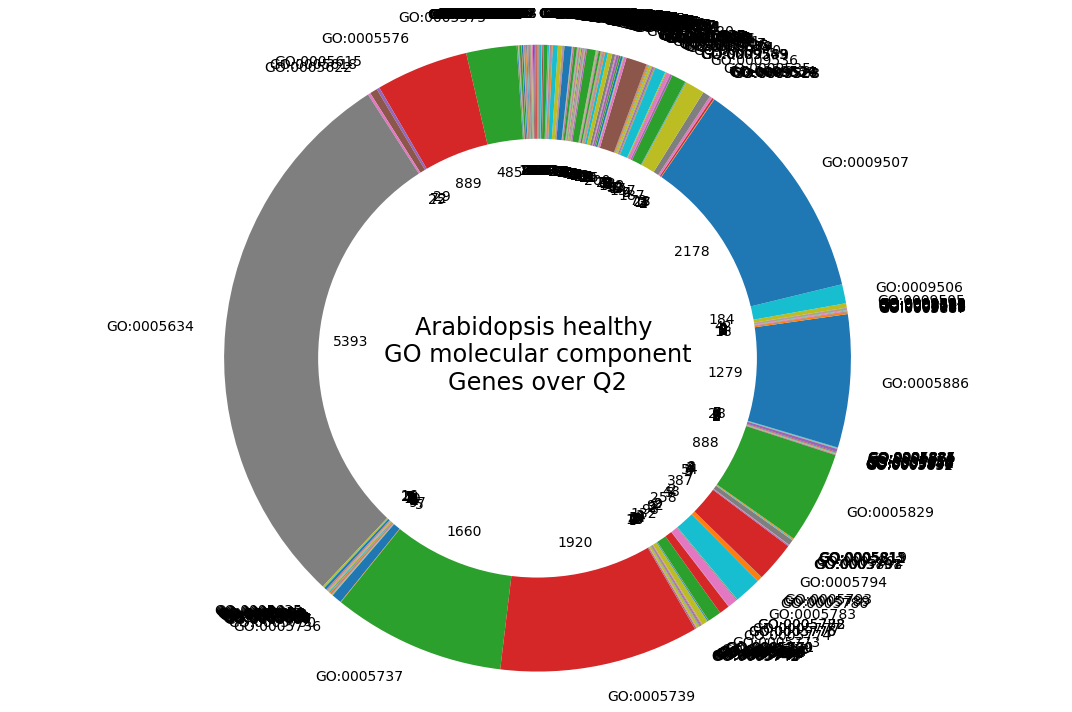

In [96]:
make_pie_donut_chart(data2, goslim2, "Arabidopsis healthy \nGO "+ title_plot +"\nGenes over Q2")

In [97]:
df_TopGO_terms =  df_tmp_healthy.sort_values(['Genes'], ascending=False).head(10)
df_TopGO_terms

,GO_id,Genes
73,GO:0005634,5393
203,GO:0009507,2178
107,GO:0005739,1920
106,GO:0005737,1660
175,GO:0005886,1279
69,GO:0005576,889
151,GO:0005829,888
68,GO:0005575,485
141,GO:0005794,387
135,GO:0005783,258


In [98]:
#df_gene_func.head(3)

In [100]:
## Filter df by molecular function (proceses and component are removed, just keep funciton category)
pd.set_option('display.max_colwidth', None)
df_10TopGO_desc = df_gene_func[df_gene_func['GO_id']=='GO:0005634']
df_10TopGO_desc.head(3)

,Genes,GO_term,GO_id,TAIR_id,category,GO_slim
0,AT1G01010,nucleus,GO:0005634,537.0,comp,nucleus
25,AT1G01030,nucleus,GO:0005634,537.0,comp,nucleus
29,AT1G01040,nucleus,GO:0005634,537.0,comp,nucleus


### Integrate results to plot as comparison

In [101]:
df_infected = df_tmp_infected.rename({'Genes':'Genes_Inf'}, axis='columns')
print(len(df_infected), 'GO '+ title_plot +' in the infected dataset')
df_healthy = df_tmp_healthy.rename({'Genes':'Genes_Healthy'}, axis='columns')
print(len(df_healthy), 'GO '+ title_plot +' in the healthy dataset')

299 GO molecular component in the infected dataset
295 GO molecular component in the healthy dataset


In [102]:
# merge base on the infected counts 
df_plt_comp = df_infected.merge(df_healthy,on=['GO_id'],how='outer')
df_plt_comp.shape

(299, 3)

In [103]:
print(len(df_plt_comp))
df_plt_comp

299


,GO_id,Genes_Inf,Genes_Healthy
0,GO:0000118,4,4.0
1,GO:0000124,2,2.0
2,GO:0000127,3,3.0
3,GO:0000137,10,10.0
4,GO:0000138,15,15.0
...,...,...,...
294,GO:0101031,2,2.0
295,GO:1990071,2,2.0
296,GO:1990246,2,3.0
297,GO:1990726,2,2.0


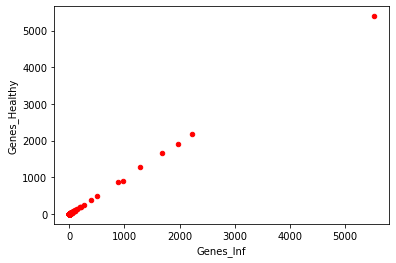

In [104]:
# a scatter plot comparing num_children and num_pets
df_plt_comp.plot(kind='scatter',x='Genes_Inf',y='Genes_Healthy',color='red')
plt.show()

In [105]:
df_plt_comp.fillna(0)
df_plt_comp.sort_values(['Genes_Inf'])
df_plt_comp

,GO_id,Genes_Inf,Genes_Healthy
0,GO:0000118,4,4.0
1,GO:0000124,2,2.0
2,GO:0000127,3,3.0
3,GO:0000137,10,10.0
4,GO:0000138,15,15.0
...,...,...,...
294,GO:0101031,2,2.0
295,GO:1990071,2,2.0
296,GO:1990246,2,3.0
297,GO:1990726,2,2.0


In [106]:
# df_plt_comp.iloc[[13,26,27]]

### Get the genes with missing data
Here we are infering that this genes (On/Off) means something

In [136]:
#filter data with missing data
df_plt_comp.columns[df_plt_comp.isna().any()]
df_plt_comp.isna().sum()

GO_id            0
Genes_Inf        0
Genes_Healthy    4
dtype: int64

In [137]:
#get the row index of the missing values
lst_nan = df_plt_comp.index[df_plt_comp.isna().any(axis=1)].to_list()
lst_nan[:5]

[101, 170, 228, 284]

In [139]:
# use the method query to get the rows with this NaN values
df_GO_Differences = df_plt_comp.iloc[lst_nan]
df_GO_Differences

,GO_id,Genes_Inf,Genes_Healthy
101,GO:0005788,2,NaN
170,GO:0009897,2,NaN
228,GO:0031357,2,NaN
284,GO:0071944,2,NaN


In [58]:
#get the x largest row indexes with NaN values 
#df_plt_comp.isna().sum(axis=1).nlargest(3)

In [59]:
# ## Remove rows with missing data
# index_with_nan = df_plt_comp.index[df_plt_comp.isna().any(axis=1)]
# index_with_nan.shape
# df_plt_comp.drop(index_with_nan,0, inplace=True)
# df_plt_comp.shape

In [119]:
labels = df_GO_Differences['GO_id'].tolist()
len_inf = len(labels)
print(len_inf, 'GO terms exclusive between datasets')
labels[:5]
#Name_list = df["Name"].tolist()

4 GO terms exclusive between datasets


['GO:0005788', 'GO:0009897', 'GO:0031357', 'GO:0071944']

In [120]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


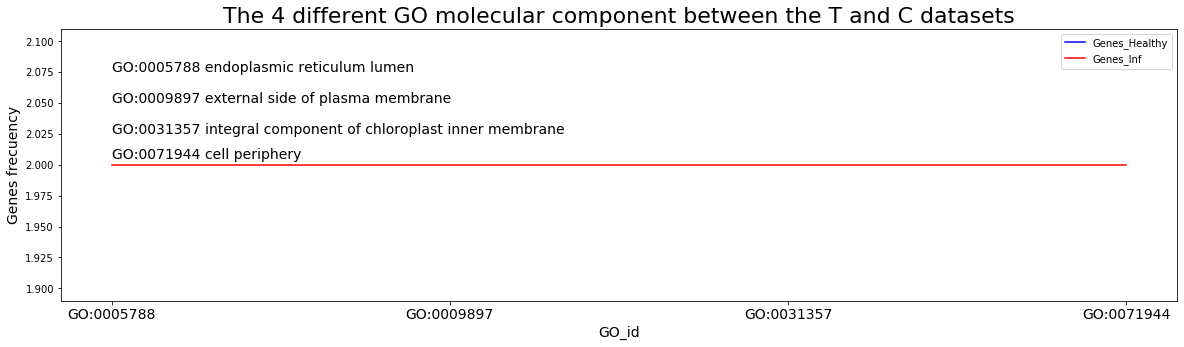

In [125]:
# gca stands for 'get current axis'
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(20,5))
plt.style.use('_classic_test_patch')

ax.set_xlabel('GO Function', color='black', fontsize=14)
ax.set_ylabel('Genes frecuency', color='black', fontsize=14)
ax.set_title("The "+ str(len_inf) +" different GO " + title_plot + " between the T and C datasets", fontsize=22)

ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()

df_GO_Differences.plot(kind='line',x='GO_id',y='Genes_Healthy', color='blue', ax=ax)
df_GO_Differences.plot(kind='line',x='GO_id',y='Genes_Inf', color='red', ax=ax)

# Used to label the GO terms in the molecular component category
plt.text(0,2.075,'GO:0005788 endoplasmic reticulum lumen', fontsize=14)
plt.text(0,2.050,'GO:0009897 external side of plasma membrane', fontsize=14)
plt.text(0,2.025,'GO:0031357 integral component of chloroplast inner membrane', fontsize=14)
plt.text(0,2.005,'GO:0071944 cell periphery', fontsize=14)
plt.xticks(color='black', fontsize=14)

# Used to label the GO terms in the functional category
# plt.text(0,2.6,'GO:0045544 gibberellin 20-oxidase activity', fontsize=14)
# plt.text(0,2.5,'GO:0045549 9-cis-epoxycarotenoid dioxygenase activity', fontsize=14)
# plt.text(26,2.6,'GO:0004351 glutamate decarboxylase activity', fontsize=14)
# plt.text(26,2.5,'GO:0004478 methionine adenosyltransferase activity', fontsize=14)
# plt.xticks(rotation=70, color='black')

plt.show()


In [135]:
df_gene_func[df_gene_func['GO_id']=='GO:0071944'][['Genes','GO_term','GO_slim']]

,Genes,GO_term,GO_slim
70762,AT2G33850,cell periphery,other cellular components
71411,AT2G34700,cell periphery,other cellular components
82351,AT2G47530,cell periphery,other cellular components
82353,AT2G47540,cell periphery,other cellular components
102742,AT3G25230,cell periphery,other cellular components
124281,AT4G02270,cell periphery,other cellular components
145955,AT4G31805,cell periphery,other cellular components


In [152]:
df_infected_MatE
df_infected_MatE[df_infected_MatE['Genes']=='AT4G31805'] #[['Genes','GO_term','GO_slim']]

,Genes,Bc12,Ch40.2,Ch22.2,Ch22.1,Ch22,Ch22.3,Bc12.1,Bc24.1,Bc18.1,Ch40.3,Ch40.1,Bc18,Bc24,Ch40
14715,AT4G31805,0.0,0.0,0.481016,0.176387,0.0,0.617979,0.0,1.72118,0.0,0.177966,0.0,0.0,1.652858,0.190176


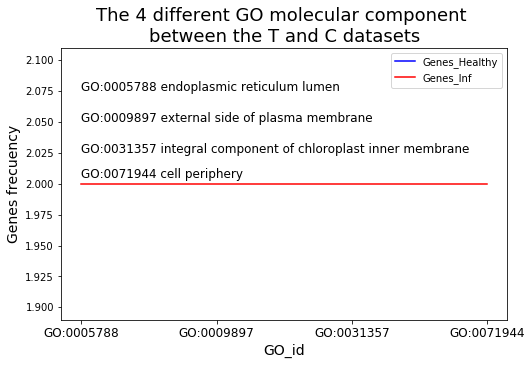

In [130]:
# gca stands for 'get current axis'
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(8,5))
plt.style.use('_classic_test_patch')

ax.set_xlabel('GO Function', color='black', fontsize=14)
ax.set_ylabel('Genes frecuency', color='black', fontsize=14)
ax.set_title("The "+ str(len_inf) +" different GO " + title_plot + " \nbetween the T and C datasets", fontsize=18)

ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()

df_GO_Differences.plot(kind='line',x='GO_id',y='Genes_Healthy', color='blue', ax=ax)
df_GO_Differences.plot(kind='line',x='GO_id',y='Genes_Inf', color='red', ax=ax)

# Used to label the GO terms in the molecular component category
plt.text(0,2.075,'GO:0005788 endoplasmic reticulum lumen', fontsize=12)
plt.text(0,2.050,'GO:0009897 external side of plasma membrane', fontsize=12)
plt.text(0,2.025,'GO:0031357 integral component of chloroplast inner membrane', fontsize=12)
plt.text(0,2.005,'GO:0071944 cell periphery', fontsize=12)
plt.xticks(color='black', fontsize=12)
plt.show()